## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
vote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()


,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [7]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [15]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [11]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [19]:
s1 = sample(0.6, n =500)

In [20]:
s1.vote.value_counts(normalize=True)

Brown    0.642
Green    0.358
Name: vote, dtype: float64

In [24]:
s = sample(0.51,n=1000)

In [25]:
s.vote.value_counts(normalize=True)

Brown    0.536
Green    0.464
Name: vote, dtype: float64

In [26]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(5000)])

In [14]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [29]:
dist.head()

,Brown,Green
vote,0.516,0.484
vote,0.524,0.476
vote,0.504,0.496
vote,0.483,0.517
vote,0.524,0.476


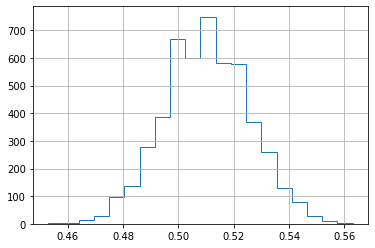

In [30]:
dist.Brown.hist(histtype='step',bins=20)

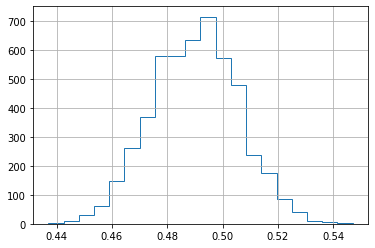

In [31]:
dist.Green.hist(histtype='step',bins = 20)

In [35]:
def samplingdist(brown,n):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(100)])

In [42]:
for i in range(10):
    print(pd.DataFrame(sample(0.8,1000).vote.value_counts(normalize=True)))

        vote
Brown  0.801
Green  0.199
        vote
Brown  0.828
Green  0.172
        vote
Brown  0.796
Green  0.204
       vote
Brown  0.78
Green  0.22
        vote
Brown  0.807
Green  0.193
        vote
Brown  0.794
Green  0.206
        vote
Brown  0.793
Green  0.207
        vote
Brown  0.817
Green  0.183
        vote
Brown  0.797
Green  0.203
       vote
Brown  0.81
Green  0.19


In [36]:
samplingdist(0.2,1000)

,Green,Brown
vote,0.801,0.199
vote,0.796,0.204
vote,0.802,0.198
vote,0.788,0.212
vote,0.802,0.198
...,...,...
vote,0.793,0.207
vote,0.786,0.214
vote,0.814,0.186
vote,0.806,0.194


In [18]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [44]:
def quantiles(brown, n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [19]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [20]:
quantiles(0.50)

(0.471, 0.531)

In [24]:
quantiles(0.48)

(0.451, 0.512025)

In [27]:
quantiles(0.54)

(0.509, 0.569)

In [28]:
dist = samplingdist(0.50,10000)

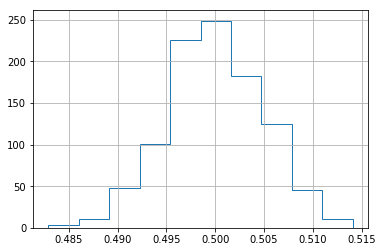

In [29]:
dist.Brown.hist(histtype='step')

In [30]:
largepoll = pd.read_csv('poll-larger.csv')

In [31]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64